## Loan Prediction System 📚
In this notebook, we are going to make an end to end project, Loan Prediction System we will also deploy it.

Outline 📚
Loading and Exploring the data

Working with Missing values

Dropping Unecessary columns

Visualization Or Making a Story Board

Encoding the Categorical data

Model Development

Dividing the data

Using GaussianNB

Loss Function

Using SVC With Grid Search CV

XGBoost Classifier

Decision Tree Using Randomized Search

Random Forest Using Randomized Search

Selecting and Saving the Model

Coding a website🔥🔥

In [60]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [7]:
train_data = pd.read_csv("train_loan.csv") 
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df=train_data

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
print(df.shape)

(614, 13)


In [12]:
#Missing data
df.isnull().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
def missing_values(df): 
    a = num_null_values = df.isnull().sum()  
    return a 

In [14]:
missing_values(df)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
#Remove unused Features
df.drop(["Loan_ID","Dependents"], axis=1, inplace=True)

## Categorical Data
1-Married               
2-Education  
3-Property_Area         
4-Loan_Status  
5-Education


# Dealing with NAN Values in Categorical Features

In [18]:
cols = df[["Gender", "Married", "Self_Employed"]] 
for  i in cols: 
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

In [19]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
missing_values(df)

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
missing_values(df)

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Numerical Data
1-ApplicantIncome                      
2-LoanAmount             
3-CoapplicantIncome              
4-Loan_Amount_Term  
5-Credit_History


In [23]:
#### Dealing with Numerical Values missig_data  

n_cols = df[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    df[i].fillna(df[i].mean(axis=0), inplace=True)

In [24]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [25]:
missing_values(df)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Visualization

In [26]:
# will create function to visualize loan status abd its distrubtion with repect to any Feature using (col) and Bar chart
def bar_chart(col):
    Approved = df[df["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = df[df["Loan_Status"]=="N"][col].value_counts() 
    df1=pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")
    

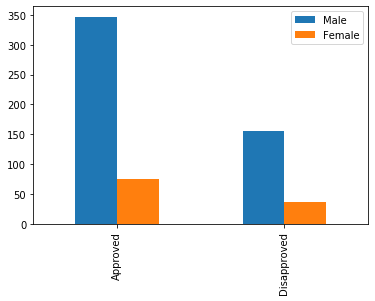

In [27]:
bar_chart("Gender")


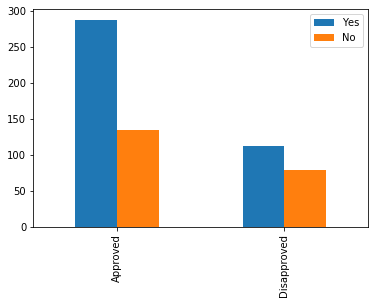

In [28]:
bar_chart("Married")


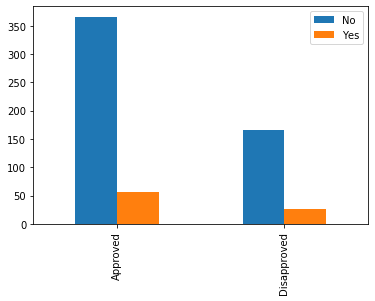

In [29]:
bar_chart("Self_Employed")


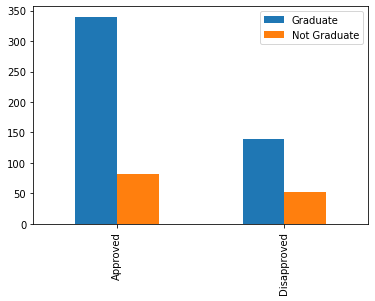

In [30]:

bar_chart("Education")

In [31]:
#Encoder of Categorical Feature using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
df[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(df[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']])
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [32]:
# Convert  Categorical Values from float to integer values
df[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']].astype('int')

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [33]:
df=df[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status','Credit_History','LoanAmount','CoapplicantIncome','Loan_Amount_Term']].astype('int')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Education          614 non-null    int32
 3   Self_Employed      614 non-null    int32
 4   Property_Area      614 non-null    int32
 5   Loan_Status        614 non-null    int32
 6   Credit_History     614 non-null    int32
 7   LoanAmount         614 non-null    int32
 8   CoapplicantIncome  614 non-null    int32
 9   Loan_Amount_Term   614 non-null    int32
dtypes: int32(10)
memory usage: 24.1 KB


In [35]:
df

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Credit_History,LoanAmount,CoapplicantIncome,Loan_Amount_Term
0,1,0,0,0,2,1,1,146,0,360
1,1,1,0,0,0,0,1,128,1508,360
2,1,1,0,1,2,1,1,66,0,360
3,1,1,1,0,2,1,1,120,2358,360
4,1,0,0,0,2,1,1,141,0,360
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,1,71,0,360
610,1,1,0,0,0,1,1,40,0,180
611,1,1,0,0,2,1,1,253,240,360
612,1,1,0,0,2,1,1,187,0,360


## Model Selection

In [36]:
from sklearn.model_selection import train_test_split  
X = train_data.drop("Loan_Status", axis=1) 
y = train_data["Loan_Status"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


In [37]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,1.0,1.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,1.0,1.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [38]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [39]:
# Using NaiveBayes
from sklearn.naive_bayes import GaussianNB 
gfc = GaussianNB() 
gfc.fit(X_train, y_train) 
pred1 = gfc.predict(X_test)

In [40]:
X_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
414,0.0,1.0,1.0,0.0,2149,3237.0,178.0,360.0,0.0,1.0
569,1.0,1.0,0.0,0.0,3166,2064.0,104.0,360.0,0.0,2.0
265,1.0,0.0,0.0,0.0,4095,3447.0,151.0,360.0,1.0,0.0
84,1.0,1.0,0.0,0.0,3988,0.0,50.0,240.0,1.0,2.0
109,1.0,1.0,1.0,0.0,2071,754.0,94.0,480.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
152,1.0,0.0,0.0,0.0,9166,0.0,244.0,360.0,1.0,2.0
589,1.0,1.0,0.0,1.0,2726,0.0,106.0,360.0,0.0,1.0
123,1.0,1.0,0.0,0.0,2957,0.0,81.0,360.0,1.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0


In [41]:
pred1

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1.])

In [42]:
#To measure Accuarcy of any model we will create function to measure it
# Select Confusion (Evaluation) Matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score 
def loss(y_true, y_pred): 
    pre=  precision_score(y_true, y_pred) 
    rec = recall_score(y_true, y_pred) 
    acc = accuracy_score(y_true, y_pred) 
    print(pre) 
    print(rec) 
    print(acc) 


In [43]:
loss(y_test, pred1)


0.7766990291262136
0.9523809523809523
0.7804878048780488


#### That Mean that when we used GaussianNB the  precision_score= 77.66 & recall_score=92.23 approch to be 1 & accuracy_score = 78.04 

In [44]:
# Using Support Vector classifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
svc=SVC()

In [45]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.687, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.694, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [46]:
param_grid

{'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf']}

In [47]:
#Select best parameters
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [48]:
#Apply parameters of SVC model and evalute model also calculate
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')  
svc.fit(X_train, y_train) 
pred2 = svc.predict(X_test) 
loss(y_test,pred2)

0.6829268292682927
1.0
0.6829268292682927


In [49]:
# Using XGBOOST classifier

from xgboost import XGBClassifier 
#Define Model Parameters
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train) 
pred3 = xgb.predict(X_test) 
loss(y_test, pred3)

0.7888888888888889
0.8452380952380952
0.7398373983739838


In [50]:
#Select Decision Tree Classifier 
#Select Random Forest Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 


def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [51]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.819
Test score: 0.772


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=0.02, min_samples_split=10,
                       min_weight_fraction_leaf=0.005, presort='deprecated',
                       random_state=2, splitter='random')

In [52]:
#Define Decision Treee parameters
DS=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=0.02, min_samples_split=10,
                       min_weight_fraction_leaf=0.005, presort='deprecated',
                       random_state=2, splitter='random')
DS.fit(X_train, y_train) 
pred4 =DS.predict(X_test) 
loss(y_test, pred4)

0.7592592592592593
0.9761904761904762
0.7723577235772358


In [53]:
#Select Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

Training score: 0.819
Test score: 0.772


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [57]:
#Saving Model by using Joplib
import joblib 
joblib.dump(DS, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)


array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1.])

In [61]:
import flask
flask.__version__


'1.1.2'